# **Assignment 2**
Ian Scott
24/02/2025

### **Setup**

In [31]:
#setwd("/Users/ianscott/Documents/882_assignment_2")

### Loading Libraries ###
library(ISLR)
library(tidyverse)
library(caret)
library(rsample)
library(FNN)
library(glmnet)
library(pROC)

### Loading Data
data <- read.csv(file = "loan-defs.csv")

### **Question 1**

In [32]:
### Split the data, using 0.75 splits the data into a training sample of 15,000 and a test sample of 5,000.
df_split = initial_split(data = data, prop = 0.75)
df_train = training(df_split)
df_test = testing(df_split)

### **Question 2**

In [33]:
### Linear regression model.

# Lets test a few models.
models <- list( 
    lm1 <- lm(data = data, formula = default ~ age + gender + income + balance + own + miss + factor(educ)),
    lm2 <- lm(data = data, formula = default ~ age + I(age^2) + gender + income + balance + own + miss + factor(educ)),
    lm3 <- lm(data = data, formula = default ~ age + gender + income + I(income^2) +I(balance^2) + own + miss + factor(educ)),
    lm3 <- lm(data = data, formula = default ~ age + I(age^2) + gender + income + I(income^2) +I(balance^2) + own + miss + factor(educ))
)

# Function to extract R-squared value
get_r2 <- function(model) {
  summary(model)$r.squared
}

# Function to extract RMSE , which indicates the accuracy of model predictions
get_rmse <- function(model) {
  residuals <- model$residuals
  sqrt(mean(residuals^2))
}

#Create a list of R^2 values
r2_values <- sapply(models, get_r2)
max_r2_index <- which.max(r2_values)
max_r2_value <- max(r2_values)

#Create a list of RMSE values
rmse_values <- sapply(models, get_rmse)
min_rmse_index <- which.min(rmse_values)
min_rmse_value <- min(rmse_values)

# Create a data frame with model numbers as row names
lm_model_metrics <- data.frame(Model = seq_along(models), 
  R2 = r2_values, 
  RMSE = rmse_values)

# Display the table
print(lm_model_metrics)

  Model        R2      RMSE
1     1 0.2293780 0.2150910
2     2 0.2294532 0.2150805
3     3 0.2103879 0.2177250
4     4 0.2104788 0.2177125


Model $2$ has the highest $R^2$ and lowest RMSE values. This suggests it has the highest explanatory power and most accurate predictions. I pick Model 2 as the most accurate model. When the age squared term is added there is an increase in both explanatory power and accuracy. This is expected given it is not inconceivable that a nonlinear relationship exists between default rates and age. People who are very young or very old could be more/less likely to default than someone who is in the middle of the age dostribution, and enjoys more economic stability.

In [34]:
# Show the results of the best performing model
summary(lm2)


Call:
lm(formula = default ~ age + I(age^2) + gender + income + balance + 
    own + miss + factor(educ), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80699 -0.06768 -0.02192  0.01002  1.02243 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.353e-02  1.910e-02  -4.897 9.81e-07 ***
age            2.486e-03  7.946e-04   3.129  0.00176 ** 
I(age^2)      -1.124e-05  8.051e-06  -1.396  0.16265    
gender         1.271e-02  3.093e-03   4.110 3.98e-05 ***
income        -1.848e-07  3.764e-08  -4.909 9.22e-07 ***
balance        5.069e-05  1.490e-06  34.028  < 2e-16 ***
own            4.235e-03  4.086e-03   1.037  0.29998    
miss           8.588e-02  2.904e-03  29.573  < 2e-16 ***
factor(educ)2 -1.575e-03  4.764e-03  -0.331  0.74100    
factor(educ)3  6.161e-03  5.151e-03   1.196  0.23173    
factor(educ)4 -4.206e-02  5.716e-03  -7.359 1.92e-13 ***
factor(educ)5 -3.790e-02  7.519e-03  -5.041 4.67e-07 ***
---
Signif. codes:  

### **Question 3**

In [35]:
### Logit regression model
gmodels <- list( 
    glm1 <- glm(data = data, family = "binomial", formula = default ~ age + gender + income + balance + own + miss + factor(educ)),
    glm2 <- glm(data = data, family = "binomial", formula = default ~ age + I(age^2) + gender + income + balance + own + miss + factor(educ)),
    glm3 <- glm(data = data, family = "binomial", formula = default ~ age + gender + income + I(income^2) +I(balance^2) + own + miss + factor(educ)),
    glm3 <- glm(data = data, family = "binomial", formula = default ~ age + I(age^2) + gender + income + I(income^2) +I(balance^2) + own + miss + factor(educ))
)

# Function to extract RMSE , which indicates the accuracy of model predictions
get_rmse <- function(gmodel) {
  residuals <- gmodel$residuals
  sqrt(mean(residuals^2))
}

#Create a list of RMSE values
rmse_values <- sapply(gmodels, get_rmse)
min_rmse_index <- which.min(rmse_values)
min_rmse_value <- min(rmse_values)

# Create a data frame with model numbers as row names
glm_model_metrics <- data.frame(Model = seq_along(models),
  RMSE = rmse_values)

print(glm_model_metrics)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


  Model     RMSE
1     1 6.083303
2     2 5.955862
3     3 6.619204
4     4 6.491918


Model 2 has the lowest RMSE value, suggesting it has the most accurate predictions. Model 2 is formulated the same as in Question 2. I chose the same models because it makes sense to compare the performance of the same model with a different estimation technique (i.e. OLS vs Logit). The age squared term makes sense for the same reasons discussed in Question 2.

In [36]:
summary(glm2)


Call:
glm(formula = default ~ age + I(age^2) + gender + income + balance + 
    own + miss + factor(educ), family = "binomial", data = data)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -6.393e+00  4.866e-01 -13.139  < 2e-16 ***
age            7.613e-02  1.944e-02   3.917 8.97e-05 ***
I(age^2)      -4.582e-04  1.888e-04  -2.427   0.0152 *  
gender         2.873e-01  7.003e-02   4.103 4.08e-05 ***
income        -6.187e-06  1.214e-06  -5.097 3.45e-07 ***
balance        4.532e-04  2.254e-05  20.108  < 2e-16 ***
own            9.169e-02  9.096e-02   1.008   0.3134    
miss           9.771e-01  4.328e-02  22.575  < 2e-16 ***
factor(educ)2 -7.062e-02  9.722e-02  -0.726   0.4676    
factor(educ)3  1.397e-01  1.061e-01   1.316   0.1881    
factor(educ)4 -1.274e+00  1.550e-01  -8.220  < 2e-16 ***
factor(educ)5 -1.425e+00  2.409e-01  -5.917 3.28e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial

### **Question 4**

#### **Ridge Logistic Regression**

In [37]:
# Create matrices of the dependent and independent variables
X1 = as.matrix(df_train[,c('age','gender','income','balance','own','miss','educ')])
y1 = as.matrix(df_train[,'default'])

Optimal lambda (lambda.min): 0.01037566 
Binomial deviance at lambda.min: 0.3409407 
Largest lambda within 1SE of optimal lambda (lambda1se): 0.04597064 
Binomial deviance at lambda1se: 0.3492655 


8 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -4.286122e+00
age          2.132915e-02
gender       1.620473e-01
income      -4.533673e-06
balance      4.170434e-04
own          1.930979e-01
miss         8.176270e-01
educ        -2.287853e-01

8 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -3.787288e+00
age          1.192697e-02
gender       8.921338e-02
income      -2.274748e-06
balance      3.392934e-04
own          1.645903e-01
miss         6.567374e-01
educ        -1.424023e-01

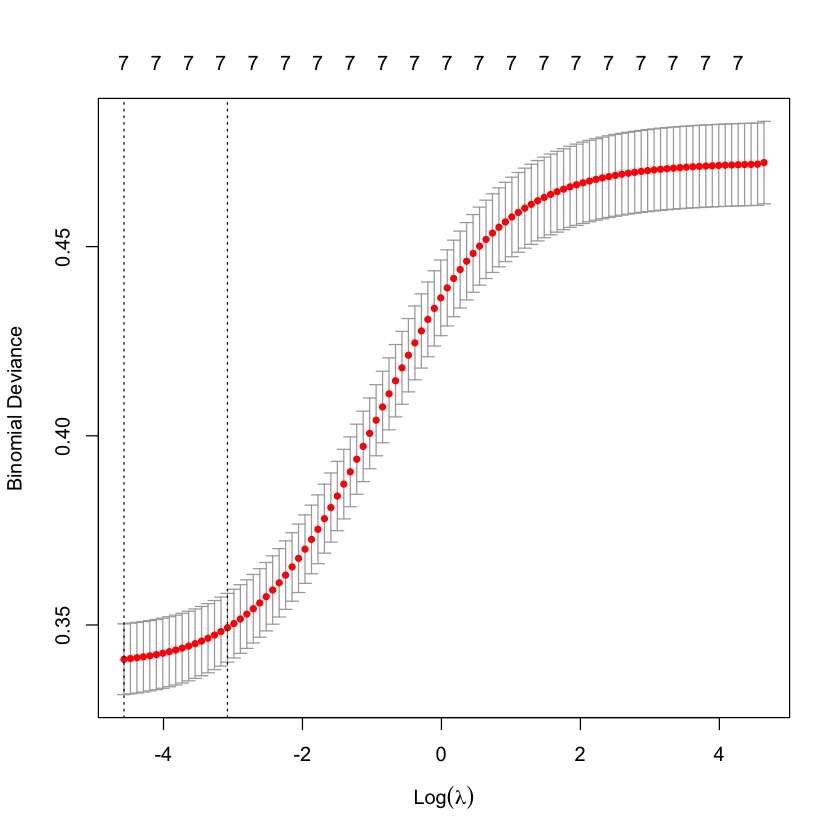

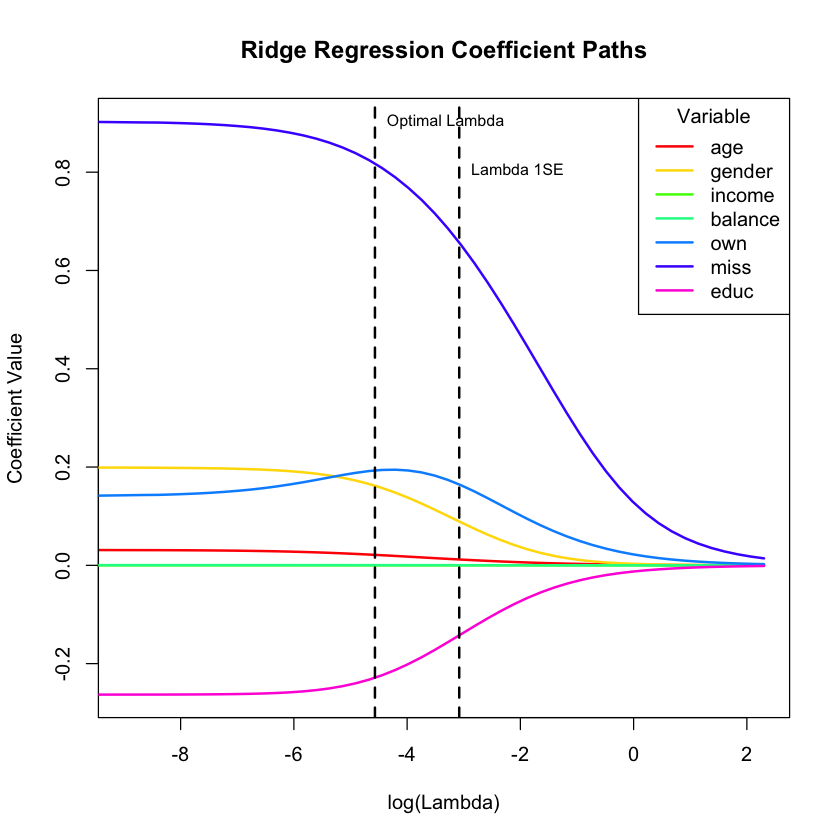

In [38]:
# Cross-validation to choose lambda
ridge_reg_cv = cv.glmnet(x=X1,y=y1,family='binomial',alpha=0,nfolds=100)

# Get important values of lambda and binomial deviance
lambda_opt <- ridge_reg_cv$lambda.min
lambda1se <- ridge_reg_cv$lambda.1se
lambda_min_index <- which(ridge_reg_cv$lambda == lambda_opt)
lambda_1se_index <- which(ridge_reg_cv$lambda == lambda1se)
binomial_dev_min <- ridge_reg_cv$cvm[lambda_min_index]
binomial_dev_1se <- ridge_reg_cv$cvm[lambda_1se_index]

# Print results
cat("Optimal lambda (lambda.min):", lambda_opt, "\n")
cat("Binomial deviance at lambda.min:", binomial_dev_min, "\n")
cat("Largest lambda within 1SE of optimal lambda (lambda1se):", lambda1se, "\n")
cat("Binomial deviance at lambda1se:", binomial_dev_1se, "\n")
lmin = ridge_reg_cv$lambda.min
l1se = ridge_reg_cv$lambda.1se
coef(ridge_reg_cv,s=lmin)
coef(ridge_reg_cv,s=l1se)
plot(ridge_reg_cv)

# Define a custom lambda squenece to plot coefficient paths. This extends the calculations to be able to visualize the paths with the optimal lambda indicated.
lambda_seq <- exp(seq(log(1e-9), log(10), length.out = 100))

# Fit Ridge Regression with extended lambda sequence
ridge_reg <- glmnet(x = X1, y = y1, family = "binomial", alpha = 0, lambda = lambda_seq)

# Extract coefficient matrix and lambda values
coef_matrix <- as.matrix(ridge_reg$beta)
lambda_vals <- ridge_reg$lambda

# Define variables and indices for the plot, and assign them colours
selected_vars <- c('age', 'gender', 'income', 'balance', 'own', 'miss', 'educ')
selected_indices <- which(rownames(coef_matrix) %in% selected_vars)
num_vars <- length(selected_indices)
colors <- rainbow(num_vars)

# Create the base plot
plot(log(lambda_vals), coef_matrix[selected_indices[1], ], type = "l",
     col = colors[1], lwd = 2, xlab = "log(Lambda)", ylab = "Coefficient Value",
     main = "Ridge Regression Coefficient Paths", 
     ylim = range(coef_matrix[selected_indices, ]),
     xlim = c(-9, max(log(lambda_vals))))  # Ensures x-axis starts at -9
# Add remaining coefficient paths
for (i in 2:num_vars) {
  lines(log(lambda_vals), coef_matrix[selected_indices[i], ], col = colors[i], lwd = 2)
}

# Add a legend and the relevant annotations
legend("topright", legend = selected_vars, col = colors, lty = 1, lwd = 2, title = "Variable")
abline(v = log(lambda_opt), col = "black", lty = 2, lwd = 2)
text(log(lambda_opt), max(coef_matrix[selected_indices, ]), labels = "Optimal Lambda", pos = 4, cex = 0.8, col = "black")
abline(v = log(lambda1se), col = "black", lty = 2, lwd = 2)
text(log(lambda1se), max(coef_matrix[selected_indices, ]-0.1), labels = "Lambda 1SE", pos = 4, cex = 0.8, col = "black")


#### **LASSO Logistic Regression**

Optimal lambda (lambda.min): 0.000355934 
Binomial deviance at lambda.min: 0.3398965 
Largest lambda within 1 standard error of the optimal lambda (lambda1se): 0.009236573 
Binomial deviance at lambda1se: 0.3398965 


8 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -4.647298e+00
age          3.040584e-02
gender       1.848049e-01
income      -6.886836e-06
balance      4.523668e-04
own          1.286228e-01
miss         8.949724e-01
educ        -2.602632e-01

8 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -3.7133349189
age          0.0102773219
gender       .           
income       .           
balance      0.0003967295
own          .           
miss         0.7387218442
educ        -0.1670410159

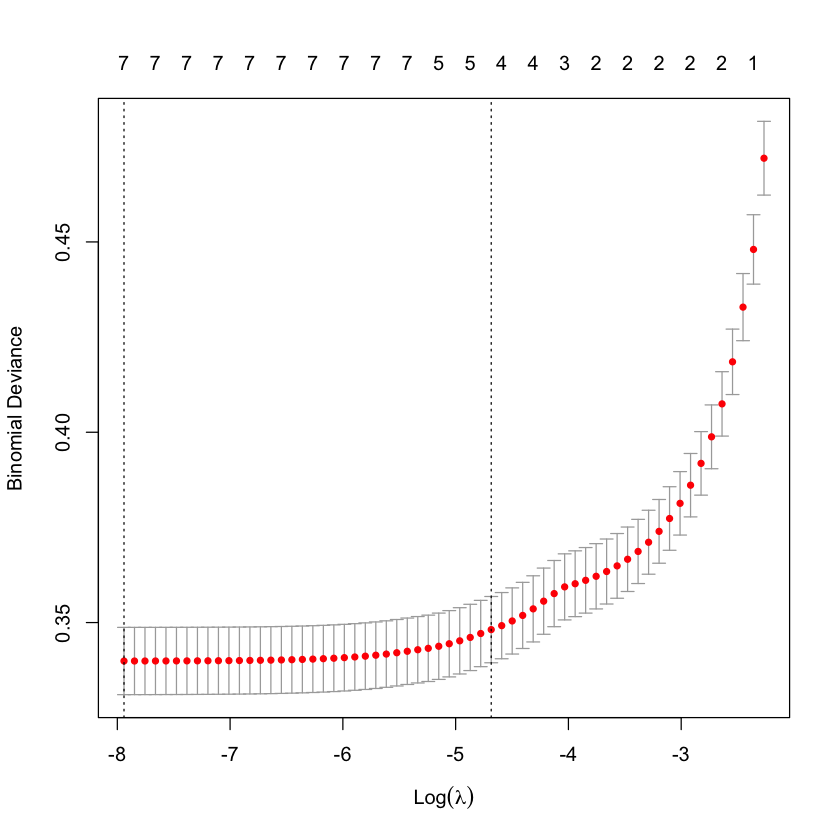

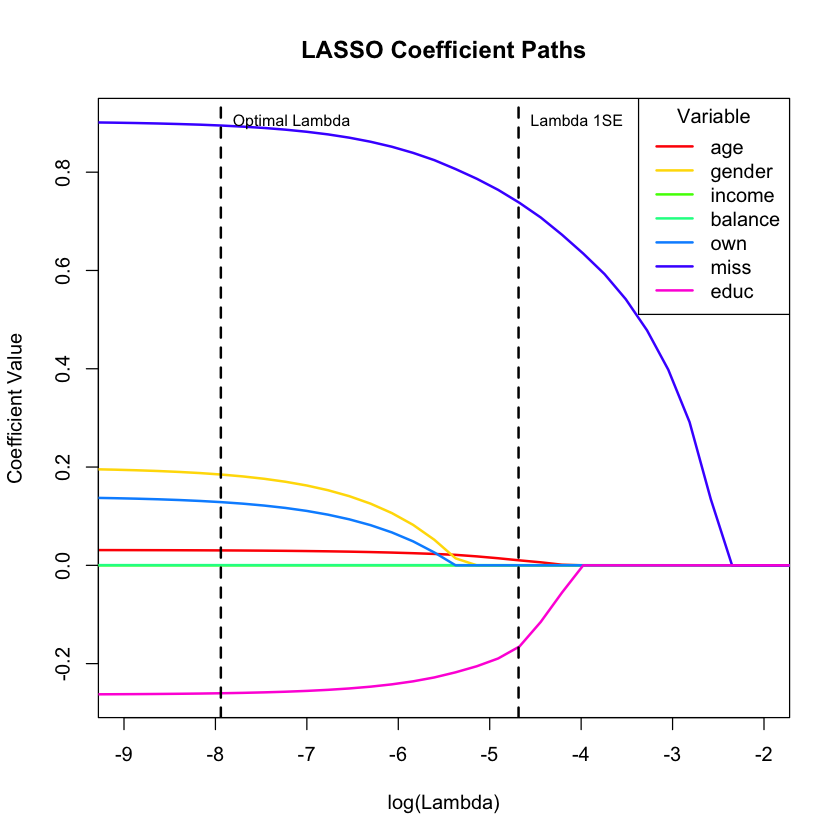

In [47]:
#Fit the LASSO model with cross-validation
lasso_reg_cv = cv.glmnet(X1,y1,family='binomial',alpha=1, nfolds = 100)

#Find the optimal lambda and the binomial deviance at that lambda, and the same for the largest lambda within 1SE of the optimal lambda.
lambda_opt <- lasso_reg_cv$lambda.min
lambda1se <- lasso_reg_cv$lambda.1se
lambda_min_index <- which(lasso_reg_cv$lambda == lambda_opt)
lambda_1se_index <- which(lasso_reg_cv$lambda == lambda1se)
binomial_dev_min <- lasso_reg_cv$cvm[lambda_min_index]
binomial_dev_1se <- lasso_reg_cv$cvm[lambda_1se_index]

# Print results
cat("Optimal lambda (lambda.min):", lambda_opt, "\n")
cat("Binomial deviance at lambda.min:", binomial_dev_min, "\n")
cat("Largest lambda within 1 standard error of the optimal lambda (lambda1se):", lambda1se, "\n")
cat("Binomial deviance at lambda1se:", binomial_dev_min, "\n")

lmin = lasso_reg_cv$lambda.min
l1se = lasso_reg_cv$lambda.1se
coef(lasso_reg_cv,s=lmin)
coef(lasso_reg_cv,s=l1se)

plot(lasso_reg_cv)

# Cross-validation to choose lambda
lambda_seq <- exp(seq(log(1e-9), log(10), length.out = 100))  # Ensures small lambdas

# Fit LASSO Regression with extended lambda sequence
lasso_reg <- glmnet(x = X1, y = y1, family = "binomial", alpha = 1, lambda = lambda_seq)

# Extract coefficient matrix and lambda values
coef_matrix <- as.matrix(lasso_reg$beta)
lambda_vals <- lasso_reg$lambda  # Includes extended range

# Define variables and indices, and then use these to assign colors
selected_vars <- c('age', 'gender', 'income', 'balance', 'own', 'miss', 'educ')
selected_indices <- which(rownames(coef_matrix) %in% selected_vars)
num_vars <- length(selected_indices)
colors <- rainbow(num_vars)  # Automatically generate distinct colors

# Base plot setup with x-axis starting at log(lambda) = -9
plot(log(lambda_vals), coef_matrix[selected_indices[1], ], type = "l",
     col = colors[1], lwd = 2, xlab = "log(Lambda)", ylab = "Coefficient Value",
     main = "LASSO Coefficient Paths", 
     ylim = range(coef_matrix[selected_indices, ]),
     xlim = c(-9, -2))  # Ensures x-axis starts at -9

# Add remaining coefficient paths
for (i in 2:num_vars) {
  lines(log(lambda_vals), coef_matrix[selected_indices[i], ], col = colors[i], lwd = 2)
}

# Add a legend with correctly matched colors
legend("topright", legend = selected_vars, col = colors, lty = 1, lwd = 2, title = "Variable")

# Fit LASSO Regression with extended lambda sequence
lasso_reg_cv <- cv.glmnet(x = X1, y = y1, family = "binomial", alpha = 1, nfolds = 100)

#Find and annotate important values of lambda
lambda_opt <- lasso_reg_cv$lambda.min
lambda1se <- lasso_reg_cv$lambda.1se
abline(v = log(lambda_opt), col = "black", lty = 2, lwd = 2)
abline(v = log(lambda1se), col = "black", lty = 2, lwd = 2)
text(log(lambda_opt), max(coef_matrix[selected_indices, ]), labels = "Optimal Lambda", pos = 4, cex = 0.8, col = "black")
text(log(lambda1se), max(coef_matrix[selected_indices, ]), labels = "Lambda 1SE", pos = 4, cex = 0.8, col = "black")



The optimal lambda for both models is very small. Having such a small tuning parameter indicates that there is little value in using these techniques to regularize the data. In that case, neither form of regularization makes sense to use since it barely changes the coeficients. 

We can see this in the charts of the coefficient paths. The optimal lambdas barely seem to barely affect the coefficients. The optimal lambda values do not significantly change the variables selected, or the size of their coefficients. 

The largest lambda within one standard deviation makes larger changes to the specifications. In LASSO, it has the same binomial deviance (suspiciously). But, this model sacrifices accuracy for simplicity. Since the base model has only a few variables, there is no reason to make a strong push to drop or minimize many of them.

For ridge regression it scales down many of the coefficients, but shrinks none to 0. This choice of lambda for ridge also increases the binomial deviance. As such, I see no point to use this lambda over the optimal lambda. I also see no point in using the optimal lambda over a non-regularized model given the size of lambda.

### **Question 5**

In [41]:
#Confusion matrix for linear model
lm_pred <- predict(lm2,df_test)
lm_pred <- ifelse(lm_pred > 0.5,1,0)
confusionMatrix(as.factor(lm_pred),as.factor(df_test$default))

#Since regularization does not make sense I will use the logistic model
glm_pred <- predict(glm2,df_test)
glm_pred <- ifelse(glm_pred > 0.5,1,0)
confusionMatrix(as.factor(glm_pred),as.factor(df_test$default))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4656  284
         1   11   49
                                          
               Accuracy : 0.941           
                 95% CI : (0.9341, 0.9474)
    No Information Rate : 0.9334          
    P-Value [Acc > NIR] : 0.01548         
                                          
                  Kappa : 0.2338          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.9976          
            Specificity : 0.1471          
         Pos Pred Value : 0.9425          
         Neg Pred Value : 0.8167          
             Prevalence : 0.9334          
         Detection Rate : 0.9312          
   Detection Prevalence : 0.9880          
      Balanced Accuracy : 0.5724          
                                          
       'Positive' Class : 0               
                        

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4644  264
         1   23   69
                                          
               Accuracy : 0.9426          
                 95% CI : (0.9358, 0.9489)
    No Information Rate : 0.9334          
    P-Value [Acc > NIR] : 0.004264        
                                          
                  Kappa : 0.3047          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9951          
            Specificity : 0.2072          
         Pos Pred Value : 0.9462          
         Neg Pred Value : 0.7500          
             Prevalence : 0.9334          
         Detection Rate : 0.9288          
   Detection Prevalence : 0.9816          
      Balanced Accuracy : 0.6011          
                                          
       'Positive' Class : 0               
                        

In [42]:
#Confusion matrix for linear model
lm_pred <- predict(lm2,df_test)
lm_pred <- ifelse(lm_pred > 0.2,1,0)
confusionMatrix(as.factor(lm_pred),as.factor(df_test$default))

#Since regularization does not make sense I will use the logistic model
glm_pred <- predict(glm2,df_test)
glm_pred <- ifelse(glm_pred > 0.2,1,0)
confusionMatrix(as.factor(glm_pred),as.factor(df_test$default))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4341  148
         1  326  185
                                          
               Accuracy : 0.9052          
                 95% CI : (0.8967, 0.9132)
    No Information Rate : 0.9334          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3891          
                                          
 Mcnemar's Test P-Value : 4.297e-16       
                                          
            Sensitivity : 0.9301          
            Specificity : 0.5556          
         Pos Pred Value : 0.9670          
         Neg Pred Value : 0.3620          
             Prevalence : 0.9334          
         Detection Rate : 0.8682          
   Detection Prevalence : 0.8978          
      Balanced Accuracy : 0.7429          
                                          
       'Positive' Class : 0               
                        

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4636  253
         1   31   80
                                          
               Accuracy : 0.9432          
                 95% CI : (0.9364, 0.9495)
    No Information Rate : 0.9334          
    P-Value [Acc > NIR] : 0.002487        
                                          
                  Kappa : 0.3383          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9934          
            Specificity : 0.2402          
         Pos Pred Value : 0.9483          
         Neg Pred Value : 0.7207          
             Prevalence : 0.9334          
         Detection Rate : 0.9272          
   Detection Prevalence : 0.9778          
      Balanced Accuracy : 0.6168          
                                          
       'Positive' Class : 0               
                        

Using the threshold of $0.5$ is marginally better for both models. The accuracy of the linear model decreases almost $4$% when the threshold decreases. The accuracy of the logit model increases by less than $1%$ when using the threshold of $0.2$. The logit model with a threshold of $0.5$ the most accurate, with $94.5$% accuracy

Increasing the threshold to $0.2$ makes the correct-default predictions of the linear model more than triple. These changes are much smaller for the logit model, indicating it is less sensitive to changes in threshold. This suggests the logit model is more robust, in addition to being more accurate.

The main effect of the change in threshold from $0.5$ to $0.2$ is decreasing the false negative rate for of predicted defaults in the linear model. However, it is less accurate overall because the false positive rate more than triples at the same time. The rates for the logit model remain relatively the same.

### **Question 6**

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



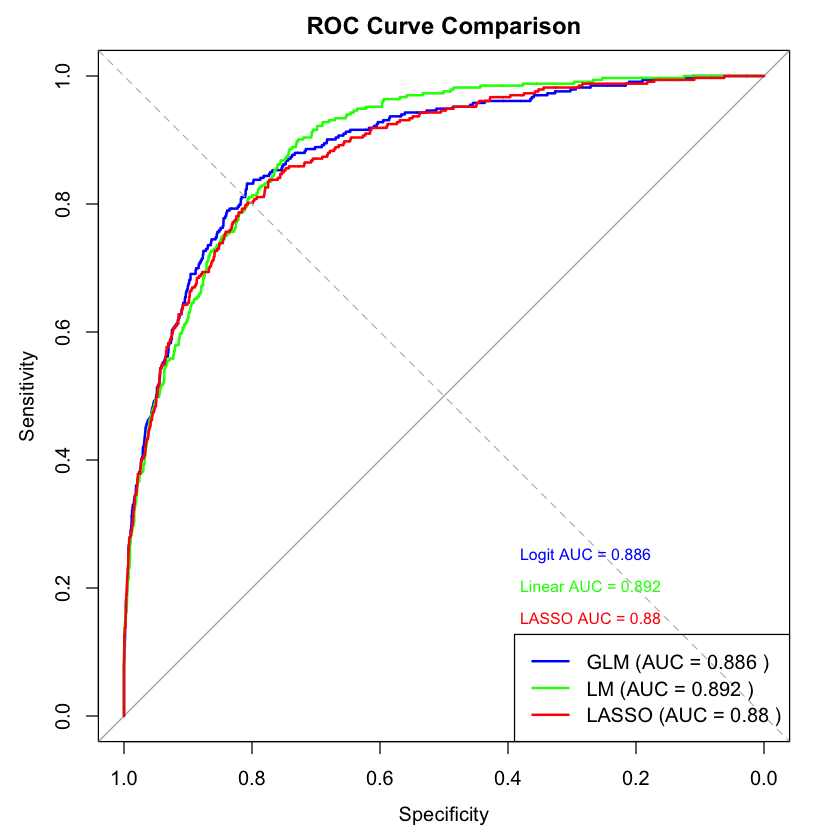

In [45]:
# Generate probabilities for the models
glm_probs <- predict(glm2, df_test, type = "response")
lm_probs <- predict(lm2, df_test)
lasso_probs <- predict(lasso_reg_cv, X_test, type = "response", s = lambda_opt)

# Assume df_test is your new test dataset
X_test = as.matrix(df_test[,c('age','gender','income','balance','own','miss','educ')])
Y_test <- df_test$default  # True labels for test data

# Generate ROC curves
roc_glm <- roc(df_test$default, glm_probs)
roc_lm <- roc(df_test$default, lm_probs)
roc_lasso <- roc(df_test$default, as.vector(lasso_probs))  # Convert to vector

# Compute AUC values
auc_glm <- auc(roc_glm)
auc_lm <- auc(roc_lm)
auc_lasso <- auc(roc_lasso)

# Plot ROC curves
plot(roc_glm, col = "blue", lwd = 2, main = "ROC Curve Comparison")
lines(roc_lm, col = "green", lwd = 2)
lines(roc_lasso, col = "red", lwd = 2)
abline(a = 0, b = 1, lty = 2, col = "gray")  # Reference line

# Add legend
legend("bottomright",
       legend = c(paste("GLM (AUC =", round(auc_glm, 3), ")"),
                  paste("LM (AUC =", round(auc_lm, 3), ")"),
                  paste("LASSO (AUC =", round(auc_lasso, 3), ")")),
       col = c("blue", "green", "red"),
       lwd = 2)

# Optionally, place additional text annotations
text(x = 0.4, y = 0.25, labels = paste("Logit AUC =", round(auc_glm, 3)), col = "blue", cex = 0.8, pos = 4)
text(x = 0.4, y = 0.2, labels = paste("Linear AUC =", round(auc_lm, 3)), col = "green", cex = 0.8, pos = 4)
text(x = 0.4, y = 0.15, labels = paste("LASSO AUC =", round(auc_lasso, 3)), col = "red", cex = 0.8, pos = 4)


There seems to be very little difference between models at the extremes. the Linear model performs slightly better than the other models past a specificity of roughly $0.7$. Overall the linear model performs better, as it has a larger area under the curve. This is not significantly larger than the AUC of the logit model, with a difference of just $0.006$.

### **Question 7**

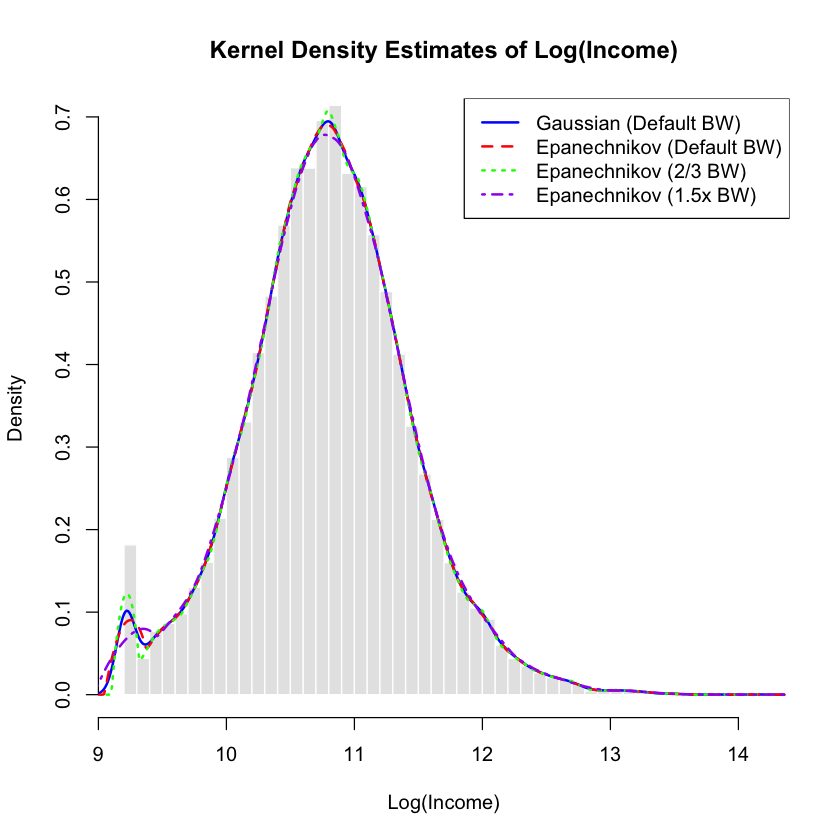

In [44]:
# Assuming your dataset is named df and contains an income variable
df = data
df$log_income <- log(df$income)

default_bw <- density(df$log_income, kernel = "epanechnikov")$bw
bw_2_3 <- (2/3) * default_bw
bw_1_5 <- 1.5 * default_bw

# Create density estimates
dens_gaussian <- density(df$log_income, kernel = "gaussian")
dens_epanechnikov <- density(df$log_income, kernel = "epanechnikov")
dens_epanechnikov_2_3 <- density(df$log_income, kernel = "epanechnikov", bw = bw_2_3)
dens_epanechnikov_1_5 <- density(df$log_income, kernel = "epanechnikov", bw = bw_1_5)

# First, plot the histogram with transparent bars
hist(df$log_income, probability = TRUE, col = rgb(0.8, 0.8, 0.8, 0.5), border = "white", 
     main = "Kernel Density Estimates of Log(Income)", xlab = "Log(Income)", ylim = c(0, max(dens_gaussian$y)), breaks = 60)

# Overlay density plots
lines(dens_gaussian, col = "blue", lwd = 2)  
lines(dens_epanechnikov, col = "red", lwd = 2, lty = 2)  # Default Epanechnikov
lines(dens_epanechnikov_2_3, col = "green", lwd = 2, lty = 3)  # 2/3 bandwidth
lines(dens_epanechnikov_1_5, col = "purple", lwd = 2, lty = 4)  # 1.5x bandwidth

# Add a legend
legend("topright", legend = c("Gaussian (Default BW)", "Epanechnikov (Default BW)", 
                              "Epanechnikov (2/3 BW)", "Epanechnikov (1.5x BW)"),
       col = c("blue", "red", "green", "purple"), lwd = 2, lty = c(1, 2, 3, 4))


I prefer the default bandwidths. The epanechnikov performs roughly the same as the gaussian distribution at the peak of the distribution. On the left tail there seems to be an outlier. This is taken into too much account by the non-default bandwidth distrbutions. It is included, to a lesser degree, by the gaussian and epanechnikov. I prefer the epanechnikov, distribution with default bandwidth, since it incorporates less of this outlier into the distribution.